# Here I test simple magic state distillation protocol with  5 qubits taken from PennyLane example

https://docs.pennylane.ai/projects/catalyst/en/latest/demos/magic_distillation_demo.html

In [2]:
import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R

from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

import bluequbit

In [11]:
import numpy as np
PI = np.pi

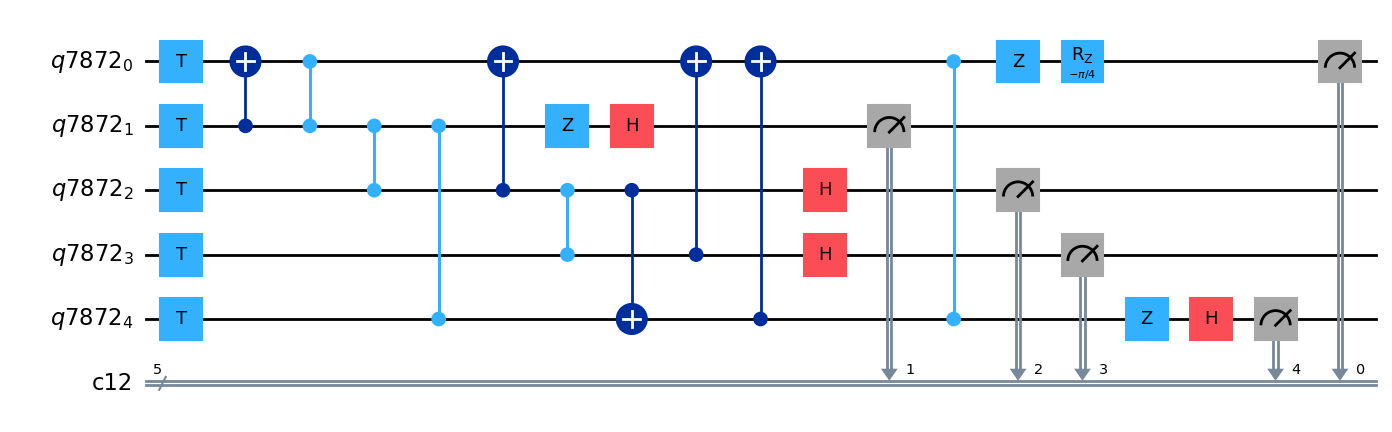

In [24]:
q_reg = Q_R(5)
cl_reg = C_R(5)
qc_mag_st = qiskit.QuantumCircuit(q_reg, cl_reg)

#Transversally create 5 copies of the T state
qc_mag_st.append(qiskit.circuit.library.TGate(),[0])
qc_mag_st.append(qiskit.circuit.library.TGate(),[1])
qc_mag_st.append(qiskit.circuit.library.TGate(),[2])
qc_mag_st.append(qiskit.circuit.library.TGate(),[3])
qc_mag_st.append(qiskit.circuit.library.TGate(),[4])

#Errors

#Error check code
qc_mag_st.cx(1,0)
qc_mag_st.cz(1,0)
qc_mag_st.cz(1,2)
qc_mag_st.cz(1,4)

qc_mag_st.cx(2,0)
qc_mag_st.cz(2,3)
qc_mag_st.cx(2,4)

qc_mag_st.cx(3,0)
qc_mag_st.cx(4,0)
qc_mag_st.cz(4,0)

qc_mag_st.z(0)
qc_mag_st.z(1)
qc_mag_st.z(4)

qc_mag_st.h(1)
qc_mag_st.h(2)
qc_mag_st.h(3)
qc_mag_st.h(4)

qc_mag_st.measure(1, 1)
qc_mag_st.measure(2, 2)
qc_mag_st.measure(3, 3)
qc_mag_st.measure(4, 4)


gate = qiskit.circuit.library.RZGate(-PI / 4)
qc_mag_st.append(gate, [0])

qc_mag_st.measure(0, 0)

qc_mag_st.draw('mpl')


In [25]:
for i in range(1000):
    shot_num = 1
    simulator = AerSimulator()
    qc_tr = transpile(qc_mag_st, simulator)
    result = simulator.run(qc_tr,shots = shot_num).result()
    counts = result.get_counts(qc_tr)
    if counts == '00001':
        print(counts)

In [26]:
counts

{'00010': 1}

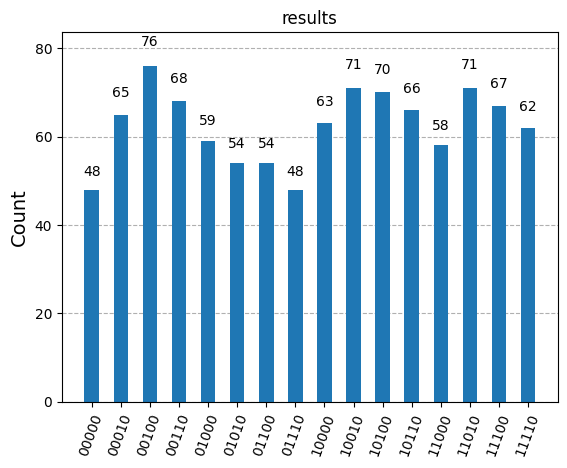

In [27]:
shot_num = 1000
simulator = AerSimulator()
qc_tr = transpile(qc_mag_st, simulator)
result = simulator.run(qc_tr,shots = shot_num).result()
counts = result.get_counts(qc_tr)

from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')